## Лабораторная работа №1
### Дьячков Вадим, 33501/4

# №1

$y = f1(x)$

$x = [x_1, x_2]$, $x_i \in \{1, 2, 3, 4\}$

$y_i \in \{0, 1\}$

In [1]:
import random as rnd
rnd.seed(42)

map1 = [['O' if rnd.random() > 0.5 else 'X' for i in range(4)] for j in range(4)]

In [2]:
def f1(x):
    return map1[x[0] - 1][x[1] - 1]

In [3]:
def print_map1():
    print('x1\\x2', end='  ')
    for i in range(1, 5):
        print(i, end = ' ')
    print()
    for i in range(1, 5):
        print(i, end=''.ljust(6))
        for j in range(1, 5):
            print(f1([i, j]), end=' ')
        print()

In [4]:
print_map1()

x1\x2  1 2 3 4 
1      O X X X 
2      O O O X 
3      X X X O 
4      X X O O 


In [5]:
f1([1, 2]) # x1 = 1, x2 = 2

'X'

In [6]:
f1([4, 4]) # x1 = 4, x2 = 4

'O'

# №2

$y = f2(x)$

$x = [x_1, x_2, x_3, x_4, x_5]$, $x_i \in \{0, 1\}$

$y_i \in \{0, 1\}$

In [7]:
map2 = {'{0:b}'.format(i).zfill(5): 0 if rnd.random() > 0.25 else 1 
        for i in range(32)}

In [8]:
def f2(x):
    return map2[''.join([str(i) for i in x])]

In [9]:
map2

{'00000': 1,
 '00001': 0,
 '00010': 0,
 '00011': 1,
 '00100': 0,
 '00101': 0,
 '00110': 0,
 '00111': 1,
 '01000': 0,
 '01001': 0,
 '01010': 1,
 '01011': 1,
 '01100': 0,
 '01101': 0,
 '01110': 0,
 '01111': 0,
 '10000': 0,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 0,
 '10110': 0,
 '10111': 0,
 '11000': 0,
 '11001': 1,
 '11010': 1,
 '11011': 0,
 '11100': 1,
 '11101': 1,
 '11110': 1,
 '11111': 0}

In [10]:
f2([1, 1, 1, 1, 0])  # 11110

1

In [11]:
f2([1, 1, 1, 1, 1])  # 11111

0

# №3

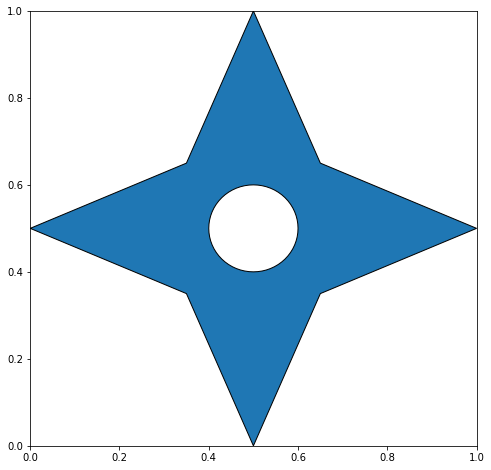

In [50]:
from matplotlib import pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

fig = plt.figure(1, figsize=(8, 8))
circle = Point(0.5, 0.5).buffer(0.1)
polygon = Polygon([(0, .5), (.35, .65), (.5, 1), (.65, .65), (1, .5), 
                   (.65, .35), (.5, 0), (.35, .35), (0, .5)])
polygon = polygon.difference(circle)

ax = fig.add_subplot(111)
ax.add_patch(PolygonPatch(polygon))
plt.show()

def is_blue_area(point):
    return polygon.contains(point)

In [51]:
is_blue_area(Point((.5, .5)))

False

In [52]:
is_blue_area(Point((.2, .2)))

False

In [53]:
is_blue_area(Point((.5, .3)))

True

# №4

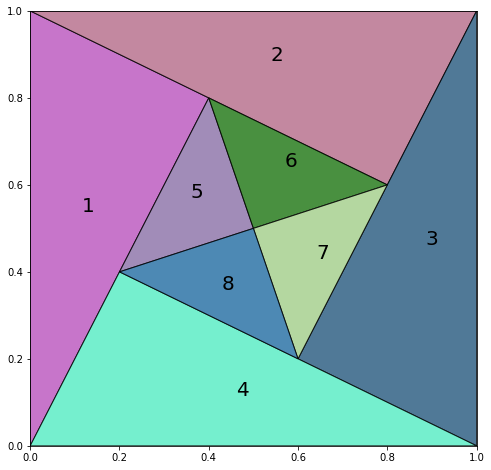

In [17]:
def random_color():
    r = lambda: rnd.randint(0, 255)
    return '#{:02X}{:02X}{:02X}'.format(r(), r(),r())

def get_position_for_text(polygon):
    coord = polygon.exterior.centroid.coords.xy
    return coord[0][0], coord[1][0]

def get_class(classes, point):
    for i, p in classes.items():
        if point.distance(p) < 1e-8:
            return i

fig = plt.figure(1, figsize=(8, 8))

polygons = {
    1: Polygon([(0, 0), (0, 1), (.4, .8)]),
    2: Polygon([(0, 1), (1, 1), (.8, .6)]),
    3: Polygon([(1, 1), (1, 0), (.6, .2)]),
    4: Polygon([(1, 0), (0, 0), (.2, .4)]),
    5: Polygon([(.2, .4), (.4, .8), (.5, .5)]),
    6: Polygon([(.4, .8), (.8, .6), (.5, .5)]),
    7: Polygon([(.6, .2), (.8, .6), (.5, .5)]),
    8: Polygon([(.2, .4), (.6, .2), (.5, .5)])
}


ax = fig.add_subplot(111)
for i, p in polygons.items():
    ax.add_patch(PolygonPatch(p, fc=random_color(), alpha=0.8))
    ax.annotate(i, xy=get_position_for_text(p), size=20)

plt.show()

In [18]:
get_class(polygons, Point(.9, .5))

3

In [19]:
get_class(polygons, Point(.4, .6))

5

# №5

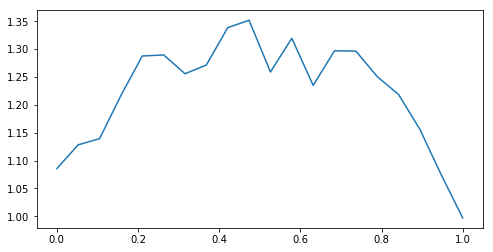

In [84]:
import numpy as np
import statsmodels.api as sm

fig = plt.figure(1, figsize=(8, 4))
x = np.linspace(0, 1, 20)
y = [i * (1 - i) + rnd.random() / 10 + rnd.normalvariate(1, 0.01) for i in x]
lowess = sm.nonparametric.lowess(y, x, frac=0.19)
plt.plot(lowess[:, 0], lowess[:, 1])
plt.show()